In [1]:
import numpy as np
import pandas as pd
from scipy import stats 
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf


QUESTION 1

Step 1: Stating the hypothesis
**Null Hypothesis (H0):** The population mean daily energy intake for the 11 women is equal to the recommended value of 7725 kJ (μ = 7725 kJ).

**Alternative Hypothesis (H1):** The population mean daily energy intake for the 11 women is not equal to the recommended value of 7725 kJ (μ ≠ 7725 kJ).

A two tailed test was used because the hypothesis were framed in a way that considered deviations in both directions from the recommended daily energy intake of 7725kJ.Simply put, the alternative hypothesis allows for deviations in both directions (above and below 7725 kJ), a two-tailed test was appropriate to assess whether the sample mean significantly differed from the recommended value in either direction.


In [2]:
# Collecting and sampling data
#define the data using numpy
daily_energy_intake = np.array([5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770])
# define the recommended mean value in kJ
recommended_mean_value = 7725
# Setting the significance level (alpha)
significance_value = 0.05
# Calculate sample mean
mean = np.mean(daily_energy_intake)
# Calculate sample standard deviation
standard_deviation = np.std(daily_energy_intake, ddof=1)
# Calculate standard error of the mean (SEM) using the formula SEM = s / √n, where n is the sample size
standard_error_mean= standard_deviation/ np.sqrt(len(daily_energy_intake))
# Calculate t-statistic using the formula  (x̄ - μ) / (SEM) where u is the recommended value
t_statistic = (mean - recommended_mean_value) / standard_error_mean
# Degrees of freedom(df) using the formula df=n-1 where n is the sample size
degrees_of_freedom = len(daily_energy_intake) - 1
# Calculate p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=degrees_of_freedom))
# Null hypothesis rejection decision

if p_value < significance_value:
    null_hypothesis_rejected = True
    conclusion = "Reject the null hypothesis"
else:
    null_hypothesis_rejected = False
    conclusion = "Fail to reject the null hypothesis"

# Display results
print(f"Sample Mean: {mean:.2f} kJ")
print(f"Sample Standard Deviation: {standard_deviation:.2f} kJ")
print(f"Standard Error of the Mean (SEM): {standard_error_mean:.2f} kJ")
print(f"t-statistic: {t_statistic:.2f}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"P-value: {p_value:.4f}")
print(f"Conclusion: {conclusion}")

# Define the desired confidence level (e.g., 95% for a 2-tailed test)
confidence_level = 0.95

# Calculate the critical value based on the confidence level and degrees of freedom
alpha = 1 - confidence_level
critical_value = stats.t.ppf(1 - alpha / 2, df=degrees_of_freedom)

# Calculate the margin of error
margin_of_error = critical_value * standard_error_mean

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

# Display the confidence interval
print(f"Confidence Interval: ({lower_bound:.2f} kJ, {upper_bound:.2f} kJ)")


Sample Mean: 6753.64 kJ
Sample Standard Deviation: 1142.12 kJ
Standard Error of the Mean (SEM): 344.36 kJ
t-statistic: -2.82
Degrees of Freedom: 10
P-value: 0.0181
Conclusion: Reject the null hypothesis
Confidence Interval: (5986.35 kJ, 7520.93 kJ)


Step 2: Making Conclusion
The obtained p-value of 0.0181 is less than the chosen significance level of 0.05. This small p-value indicates that the data has provided sufficient evidence against the null hypothesis. Therefore, we reject the null hypothesis.

Conclusion: We conclude that the population mean daily energy intake for the 11 women is not equal to the recommended value of 7725 kJ (μ ≠ 7725 kJ).

The analysis resulted in the rejection of the null hypothesis at a significance level of 0.05. As a result, it is possible that a Type I error (false positive) has occurred. This suggests that we concluded there is a deviation in daily energy intake from the recommended value when, in reality, there might not be such a deviation. 

while the analysis provides evidence against the null hypothesis, it's important to acknowledge the possibility of a Type I error and that further research or a larger sample size may be needed to confirm the findings.



QUESTION 2

Step 1: Stating the hypothesis
**Null Hypothesis (H0):** The mean GOES score for pints consumed in ireland is equal to the mean GOES score for pints consumed elsewhere

**Alternative Hypothesis (H1):** The mean GOES score for pints served in ireland is greater than  the mean GOES score for pints consumed elsewhere

step 2: Determine the type of Test
In this analysis ,a two sample t-test would be used because we are comparing the means of two independent samples which are pints consumed in 2 different locations,ireland and elsewhere.



In [3]:
#collecting and sampling data

#Mean population in Ireland
mean_ireland = 74
#standard deviation in ireland
standard_deviation_ireland = 7.4
#the sample size in ireland
sample_size_ireland = 42

# Mean population elsewhere
mean_elsewhere = 57
#standard deviation elsewhere
standard_deviation_elsewhere = 7.1
#sample size elsewhere
sample_size_elsewhere = 61

# Calculate the t-statistic for two sample t-test using the formula :
t_statistic, p_value = stats.ttest_ind_from_stats(mean_ireland, standard_deviation_ireland, sample_size_ireland, mean_elsewhere, standard_deviation_elsewhere, sample_size_elsewhere, equal_var=False, alternative='greater')

print(f"t-statistic:{t_statistic:.2f}")
print(f"p-value: {p_value}")



t-statistic:11.65
p-value: 1.1579450814371138e-19


step 3: A right tailed test is used in this analysis becuase in the alternative hypothesis,we want to test if the taste of guinness in ireland is greater than the taste of guinness served elsewhere.

step 4: Making conclusion

A p-value of p-value: 1.1579450814371138e-19 indicates that the probability of observing the calculated t-statistic (or a more extreme value) assuming the null hypothesis is true is very small (less than 0.001). Therefore, we reject the null hypothesis and conclude that the mean GOES score for pints consumed in ireland is not equal to the mean GOES score for pints consumed elsewhere hence there is a significant difference in the enjoyment of Guinness served in an Irish pub compared to elsewhere.

This means that there is strong evidence to suggest that Guinness served in an Irish pub tastes significantly better than pints served elsewhere around the globe.

with that being said,there's a possibility of a type I error and further research would be required to confirm the findings and analysis.

The difference between 74 versus 57 is significant becuase the null hypothesis was rejected and this indicates that there is a significant difference in the enjoyment of Guinness served in irish pubs compared to elsewhere. In other words,the difference in mean GOES scores(74 versus 57) is not simply due to natural random variation. It is simply significant

QUESTION 3

C:\Users\idaya\PycharmProjects\pythonProject2\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\idaya\PycharmProjects\pythonProject2\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


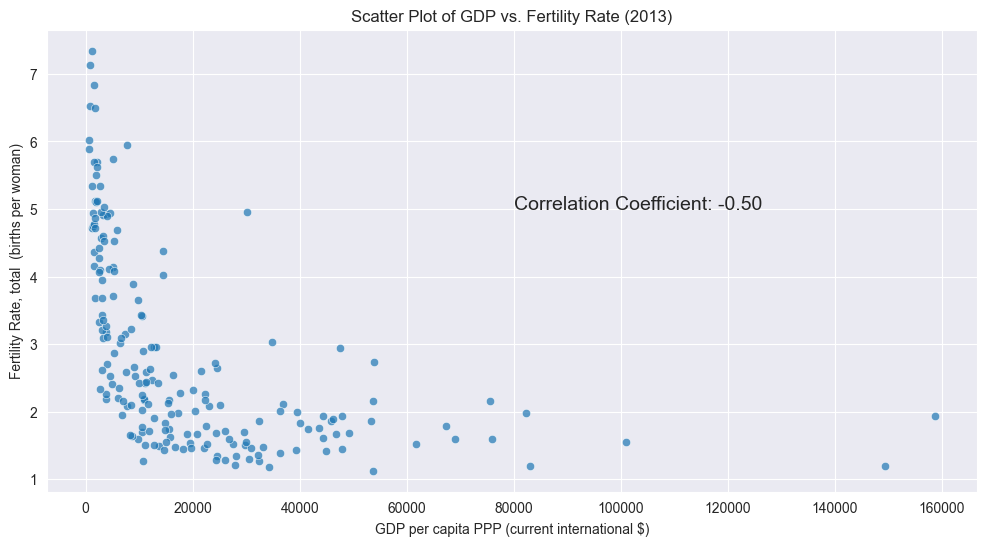

There is a negative correlation between GDP and Fertility Rate.


In [4]:

# Load and preprocess the data 
file1 = pd.read_csv('GDP.csv',skiprows=3,usecols=lambda x: 'Unnamed' not in x)  
file2=pd.read_csv('Fertility_rate.csv',usecols=lambda x: 'Unnamed' not in x)

# Filter the data for the year 2013
gdp_2013 = file1[['Country Name', 'Country Code', '2013']]
file2.rename(columns={"Economy": "Country Name"}, inplace=True)

combined_data=pd.merge(gdp_2013,file2, on ="Country Name")
combined_data_cleaned = combined_data.dropna(subset=['2013', 'Fertility rate, total (births per woman)'])

# Create a scatter plot using Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=combined_data_cleaned, x='2013', y='Fertility rate, total (births per woman)', alpha=0.7)

# Add labels and title
plt.xlabel('GDP per capita PPP (current international $)')
plt.ylabel('Fertility Rate, total  (births per woman)')
plt.title('Scatter Plot of GDP vs. Fertility Rate (2013)')

# Calculate and display the correlation coefficient
correlation_coefficient = np.corrcoef(
    combined_data_cleaned['2013'], combined_data_cleaned['Fertility rate, total (births per woman)']
)[0, 1]
plt.text(80000, 5, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=14)

# Show the plot
plt.show()

# Interpretation of the correlation coefficient
if correlation_coefficient > 0:
    interpretation = "There is a positive correlation between GDP and Fertility Rate."
elif correlation_coefficient < 0:
    interpretation = "There is a negative correlation between GDP and Fertility Rate."
else:
    interpretation = "There is no significant correlation between GDP and Fertility Rate."

print(interpretation)



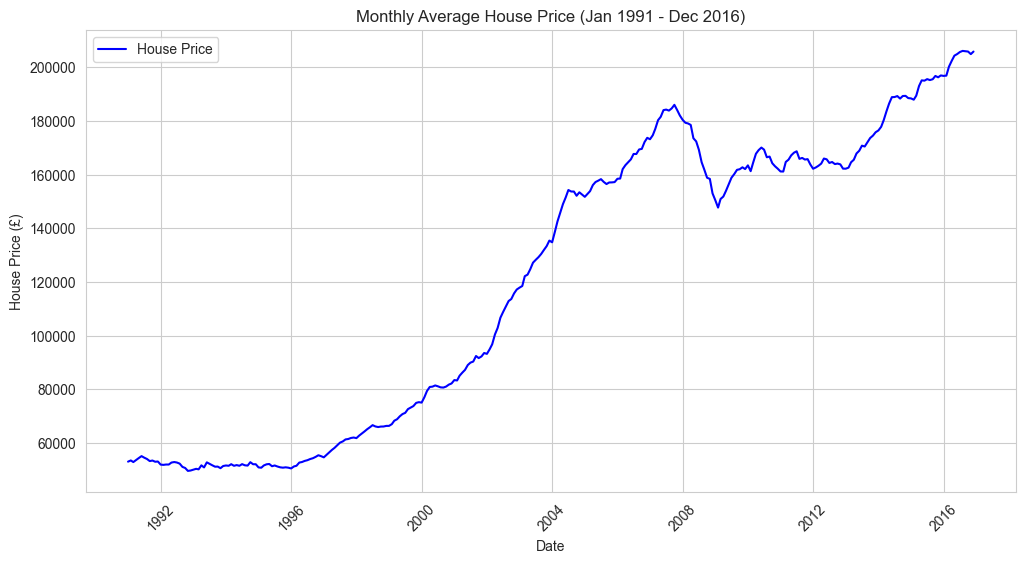

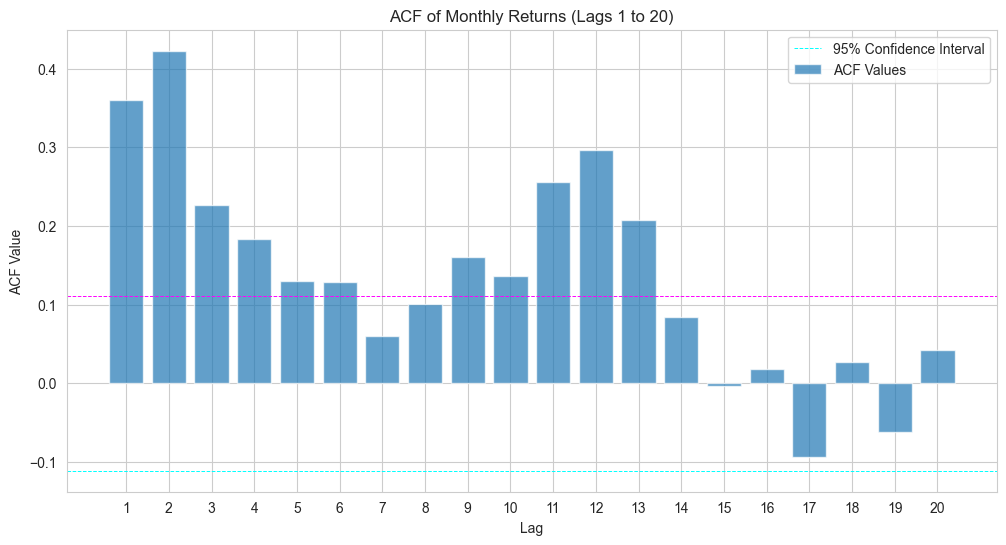

Annualized Return over the period: 5.35%


In [5]:
import warnings

# Filter out the FutureWarnings related to is_categorical_dtype
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

# Load the data from the file
data = pd.read_excel("Monthly Average House Price.xls")

# Rename the columns
data = data.rename(columns={"Unnamed: 0": "Date"})

# Convert the 'Date' column to a datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Filter the data to include only the period from Jan 1991 to Dec 2016
start_date = pd.to_datetime("1991-01-01")
end_date = pd.to_datetime("2016-12-31")
data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

# Set Seaborn style
sns.set_style("whitegrid")

# Create the time series plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Average House Price', data=data, label='House Price', color='blue')
plt.xlabel('Date')
plt.ylabel('House Price (£)')
plt.title('Monthly Average House Price (Jan 1991 - Dec 2016)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Calculating monthly returns
data['Monthly Returns'] = data['Average House Price'].pct_change()


# Calculate the ACF of Monthly Returns
lags = 20  # Number of lags to consider
acf_result = sm.tsa.acf(data['Monthly Returns'].dropna(), nlags=lags)

# Create a bar chart for ACF values
plt.figure(figsize=(12, 6))
acf_values = acf_result[1:]
lags_range = range(1, lags + 1)

# Create horizontal lines for the 95% confidence interval (p < 0.05)
conf_int = 1.96 / np.sqrt(len(data['Monthly Returns'].dropna()))
plt.axhline(y=-conf_int, color='cyan', linestyle='--', linewidth=0.7, label='95% Confidence Interval')
plt.axhline(y=conf_int, color='magenta', linestyle='--', linewidth=0.7)

plt.bar(lags_range, acf_values, alpha=0.7, label='ACF Values')
plt.xticks(lags_range)
plt.xlabel('Lag')
plt.ylabel('ACF Value')
plt.title('ACF of Monthly Returns (Lags 1 to 20)')
plt.legend()
plt.show()

# Annualized return
# Annualized return
total_return = (data['Monthly Returns'].dropna() + 1).prod()
number_of_months = len(data)
annualized_return = ((total_return) ** (12 / number_of_months)) - 1
annualized_return_percentage = annualized_return * 100

print(f"Annualized Return over the period: {annualized_return_percentage:.2f}%")



QUESTION 5

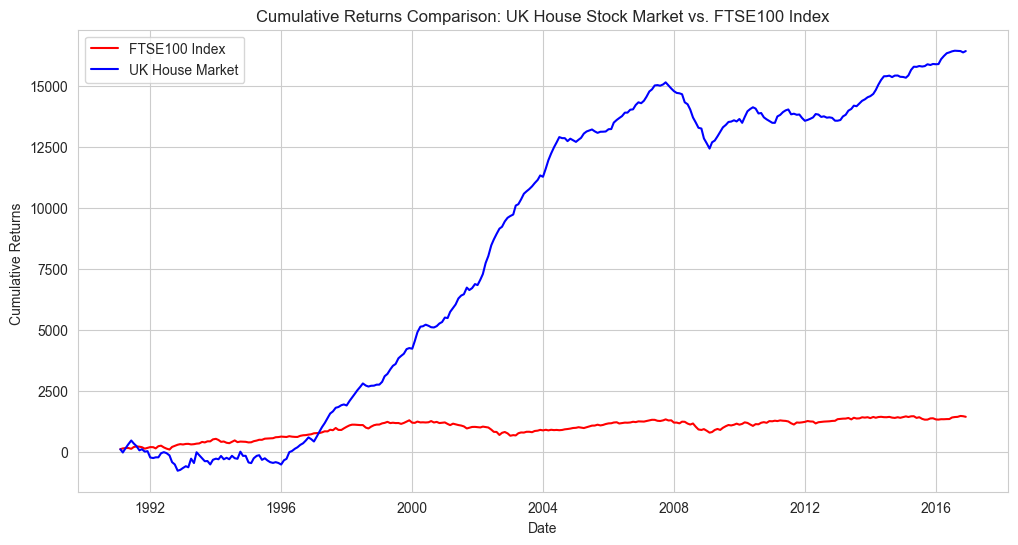

The annualized Return over the period as a percentage is given by: 4.46%


In [6]:
#Loading the dataset

df=pd.read_csv("FTSE100.csv")

#convert the "Date " column to a datatime type
df['Date']=pd.to_datetime(df['Date'])
# Sort the DataFrame by the 'Date' column in ascending order
df.sort_values(by='Date', inplace=True)

# Sort the index in ascending order
df.index=pd.RangeIndex(0,len(df),1)

# Filter the FTSE100 data to match the date range (Jan 1991 - Dec 2016)
start_date = pd.to_datetime("1991-01-01")
end_date = pd.to_datetime("2016-12-31")

df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Calculate monthly returns for the FTSE100 using percentage change method..
df['FTSE100 Monthly Returns'] = df['Adj Close'].pct_change()


# Drop any rows with NaN values 
df.dropna(subset=['FTSE100 Monthly Returns'], inplace=True)
data.dropna(subset=['Monthly Returns'], inplace=True)


# Calculate cumulative returns for both datasets using cumsum()
df['FTSE100 Cumulative Returns'] = (df['FTSE100 Monthly Returns']).cumsum()
data['House Market Cumulative Returns'] = (data['Monthly Returns']).cumsum()
 
# Normalize both time series to start at 100 in January 1991
df['Norm FTSE100 Cumulative Returns'] = df['FTSE100 Cumulative Returns'] / df['FTSE100 Cumulative Returns'].iloc[0] * 100
data['Norm House Market Cumulative Returns'] = data['House Market Cumulative Returns'] / data['House Market Cumulative Returns'].iloc[0] * 100

# Set Seaborn style
sns.set_style("whitegrid")

#  Merge the normalised DataFrames on the 'Date' column
combined_norm_data = pd.DataFrame({"Date":df["Date"],"Norm FTSE100 CumReturns":df['Norm FTSE100 Cumulative Returns'], "Norm House CumReturns":data['Norm House Market Cumulative Returns']})
#combined_norm_data.tail()
# Plot cumulative returns of both datasets using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Norm FTSE100 CumReturns', data=combined_norm_data, label="FTSE100 Index",color='red')
sns.lineplot(x='Date', y='Norm House CumReturns', data=combined_norm_data, label='UK House Market',color="blue")
plt.xlabel('Date')
plt.ylabel('Cumulative Returns ')
plt.title('Cumulative Returns Comparison: UK House Stock Market vs. FTSE100 Index')
plt.legend()
plt.show()

#calculate annualised return over the period
total_return = (df['FTSE100 Monthly Returns'].dropna() + 1).prod()
number_of_months = len(df)+1
annualized_return = ((total_return) ** (12 / number_of_months)) - 1
#multiplying by 100 to get the percentage
annualized_return_percentage = annualized_return * 100

print(f"The annualized Return over the period as a percentage is given by: {annualized_return_percentage:.2f}%")


In [10]:
data

,Date,Average House Price,INDEX Q1 1993=100,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months,Monthly Returns,House Market Cumulative Returns,Norm House Market Cumulative Returns
1,1991-02-01,53496.798746,106.720393,107.494996,0.003432,NaN,NaN,0.008390,0.008390,100.000000
2,1991-03-01,52892.861606,105.515603,106.525649,-0.009018,NaN,NaN,-0.011289,-0.002900,-34.563615
3,1991-04-01,53677.435270,107.080744,107.126622,0.005642,NaN,NaN,0.014833,0.011934,142.243755
4,1991-05-01,54385.726747,108.493710,107.266757,0.001308,NaN,NaN,0.013195,0.025129,299.527543
5,1991-06-01,55107.375085,109.933321,108.152117,0.008254,NaN,0.004352,0.013269,0.038398,457.690356
...,...,...,...,...,...,...,...,...,...,...
307,2016-08-01,206144.961815,411.237157,409.465432,0.007744,0.055643,0.009269,0.002089,1.380281,16452.475432
308,2016-09-01,206014.691677,410.977282,410.292238,0.002019,0.053326,0.010542,-0.000632,1.379649,16444.942989
309,2016-10-01,205904.191651,410.756846,410.256066,-0.000088,0.046223,0.011086,-0.000536,1.379113,16438.549648
310,2016-11-01,204947.430028,408.848209,410.018088,-0.000580,0.044025,0.008036,-0.004647,1.374466,16383.163360
